# Comparing Outcomes 

#### Some graphical comparisons of social optima and decentralized outcomes

## Decentralized solution

The first thing we try is to see if private enclosure can replicate the second-best outcome, in which a social planner controls land allocation but not labor allocation. As we show in the paper, this requires comparing the condition dictating private, decentralized enclosures:

$$
r\geq c\quad\rightarrow\quad \theta F_T^e - c \geq 0
$$

Out of this, we can get an equilibrium value of $t_e$, along with a similarly decentralized solution for $l_e$. These can be compared to the (first-best) social optimum. 

We will do this for a generic welfare function, but in a way that allows us to also compare labor, land, and societal returns. 

# Comparing First-Best solutions

We now see what the welfare loss is at the first-best solution. In this case, what we are doing is comparing the solutions to:

$$
r\geq c\quad\rightarrow\quad \theta F_T^e - c \geq 0
$$

and the value of $t_e$ deriving from the social welfare function:

$$
SW=\bar l^\alpha[1+(\Lambda_o-1)t_e]^{1-\alpha}-ct_e
$$

But we want to break each of these down by their resulting allocations. 


Maximization of $SW$ is fairly simple; we can have an interior solution so long as $\Lambda_o>1$. It is found as follows:

$$
(1-\alpha)(\Lambda_0-1)\left(\frac{\bar l}{1+(\Lambda_o-1)t_e}\right)^\alpha-c=0
$$

Which solves to readily give:

$$
t_e^* = \frac{\left(\frac{(1-\alpha)(\Lambda_o-1)}{c}\right)^\frac{1}{\alpha}\bar l - 1}{\Lambda_o-1}
$$

## Decentralized case

Our overall procedure is to solve in closed-form for the private value of $t_e$, and then see for which parameter values this also solves the optimal program. Parametrically, the decentralized solution satisfies:

$$
(1-\alpha)\theta \left(\frac{\bar L_e}{\bar T_e}\right)^\alpha = c
$$

This can be written as:

$$
(1-\alpha)\theta\bar l ^\alpha\left(\frac{l_e}{t_e}\right)^\alpha=c
$$

But we know the optimal labor allocation obeys:

$$
l_e = \frac{\Lambda t_e}{1+\left(\Lambda - 1\right)t_e}
$$

So, plugging in, we get (replicating equation 14 in the paper):

$$
(1-\alpha)\theta \bar l^\alpha \left(\frac{\Lambda}{1+(\Lambda-1)t_e}\right)^\alpha=c
$$

Which readily solves out to give:

$$
t_e=\frac{\left(\frac{(1-\alpha)\theta}{c}\right)^\frac{1}{\alpha}\Lambda \bar l-1}{\Lambda - 1}
$$

As before, so long as we are in the world in which we have $\Lambda>1$, we are in the so-called high plot-level TFP world. In this world, we have interior solutions, so we have: 

#### Decentralized enclosures

$$
t_e^*=\frac{\left(\frac{(1-\alpha)\theta}{c}\right)^\frac{1}{\alpha}\Lambda \bar l-1}{\Lambda - 1}
$$

as we demonstrate in the paper, corresponding with this solution is the labor allocation:

$$
l_e^* = \frac{\Lambda t_e}{(1+(\Lambda-1)t_e},\quad \Lambda = (\alpha\theta)^\frac{1}{1-\alpha}
$$


#### Centralized enclosures


$$
t_e^o = \frac{\left(\frac{(1-\alpha)(\Lambda_o-1)}{c}\right)^\frac{1}{\alpha}\bar l - 1}{\Lambda_o-1}
$$

where labor allocations obey:

$$
l_e^o = \frac{\Lambda t_e}{1+(\Lambda_o-1)t_e}, \quad \Lambda_o = \theta^\frac{1}{1-\alpha}
$$




### Welfare

Given the above, we can calculate welfare as one might expect. Welfare is:

$$
SW = \theta F(T_e,L_e)+ F(T_c,L_c) - cT_e
$$

which can also be written as:

$$
SW = \theta F(\bar Tt_e,\bar Ll_e) + F(\bar T(1-t_e), \bar L(1-l_e)) - c \bar Tt_e
$$

or 

$$
SW = F(\bar T,\bar L)\left[\theta F(t_e,l_e) + F(1-t_e,1-l_e)\right]-c  \bar T t_e
$$

or even better 

$$
SW = \bar T \left(F(1, \frac{\bar L}{\bar T})\left[\theta F(t_e,l_e) + F(1-t_e,1-l_e)\right]-c  t_e\right)
$$

### Parametrically

Using all of our parameters, and ignoring $\bar T$ because it is just a multiplicative constant, we can write societal welfare as:

$$
SW = \bar l^\alpha\left[\theta t_e^{1-\alpha}l_e^\alpha + (1-t_e)^{1-\alpha}(1-l_e)^\alpha\right]- ct_e
$$

### Calculating functions

Here is a function that calculates $t_e^*$, taking into account the "flat spots."

In [1]:
def tedec(theta, lbar, alpha=.35, c=1):
    
    """Function to compute the decentralized level of enclosures. Note that
       it treats the low-tfp and high-tfp cases separately, and also treats
       the case in which theta=1/alpha separately, as solutions are a bit  
       degenerate at this point."""
    
    Lambda = (theta*alpha)**(1/(1-alpha))
    
    if theta > 1/alpha:
        
        num = ((1-alpha)*theta/c)**(1/alpha)*Lambda*lbar - 1
        den = Lambda - 1
        
        teeq = num/den
        
        if num<0:
            teeq = 0
        if teeq>1:
            teeq = 1
        
    elif theta < 1/alpha:
        
        cond = (alpha*c/(1-alpha*theta)*(1-Lambda)/Lambda)**(1/alpha)

        if lbar > cond:
            teeq = 1
        else:
            teeq = 0
            
    elif theta == 1/alpha:
        
        if lbar > (c/((1-alpha)*theta))**(1/alpha):
            teeq = 1
        else:
            teeq = 0
        
            
    return teeq

Function that calculates $t_e^o$, the first-best optimal enclosure rate:

In [2]:
def teopt(theta, lbar, alpha=.35, c=1):
  
    """Function for computing first-best optimal enclosures. 
       Note that it first checks tfp to see if in fact any 
       enclosure should occur. It also checks to see if enclosure 
       wishes to be greater than one or less than one via the 
       optimal solution."""

    Lambda_o = theta**(1/(1-alpha))
    
    if Lambda_o <= 1:
        teop = 0
        
    else:
        
        num = ((1-alpha)*(Lambda_o-1)/c)**(1/alpha)*lbar - 1
        den = Lambda_o - 1
        
        teop = num/den
        
        if teop < 0:
            teop = 0
        if teop > 1:
            teop = 1
        
    return teop

Functions calculating decentralized labor, and optimal labor:

In [3]:
def ledec(theta, lbar, alpha=.35, c=1):
    
    """Decentralized labor allocation - note that t_e is calculated first, so
       we retain the same sequence of arguments for plots below"""

    te  = tedec(theta, lbar, alpha, c)
    
    Lambda = (theta*alpha)**(1/(1-alpha))
    
    le  = te*Lambda / (1 + (Lambda - 1)*te)
    
    return le
    

In [4]:
def leopt(theta, lbar, alpha=.35, c=1):
    
    """Decentralized labor allocation - note that t_e is calculated first, so
       we retain the same sequence of arguments for plots below"""

    te  = teopt(theta, lbar, alpha, c)
    
    Lambda_o = (theta)**(1/(1-alpha))
    
    le  = te*Lambda_o / (1 + (Lambda_o - 1)*te)
    
    return le
    

### Societal welfare function

In [5]:
def sw(t, l, theta, lbar, alpha=.35, c=1):
    
    part1 = theta*t**(1-alpha)*l**alpha
    
    part2 = (1-t)**(1-alpha)*(1-l)**alpha
    
    const = lbar**alpha
                         
    return const*(part1 + part2) - c*t

## Plots

Let's first plot enclosure differences as functions of the parameters:

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits import mplot3d
from matplotlib import cm

from scipy import interpolate

In [77]:
THETA = np.arange(1.1, 2.1, .01)
LBAR  = np.arange(.251, 7, .01)

T, L = np.meshgrid(THETA, LBAR)

In [78]:
TO = np.empty(np.shape(T))
TD = np.empty(np.shape(T))

for i in np.arange(np.shape(T)[0]):
    for j in np.arange(np.shape(T)[1]):
        TO[i,j] = teopt(T[i,j], L[i,j])
        TD[i,j] = tedec(T[i,j], L[i,j])
        
DIFF = TD - TO

T_l = np.log(T)
L_l = np.log(L)

# Plot of the enclosure difference

This plots decentralized versus first-best enclosure. 

C:\Users\mjbaker\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=63,72 m=67500 fp=205.094778 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


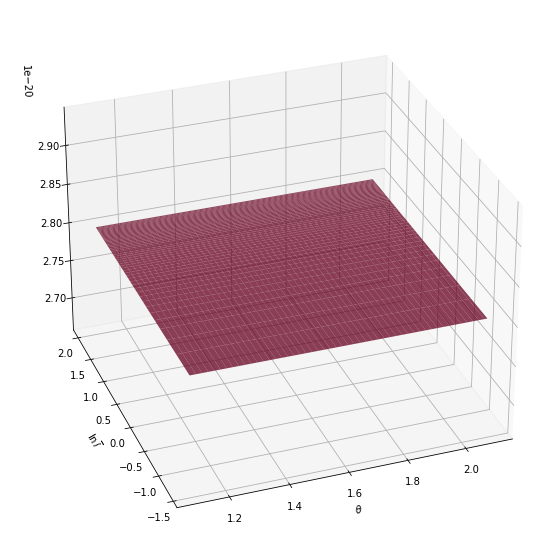

In [79]:
fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(111, projection='3d')
labx = ax.set_xlabel(r'$\theta$')
laby = ax.set_ylabel(r'$\ln\overline{l}$')

tck = interpolate.bisplrep(T, L_l, DIFF, s=0)
znew = interpolate.bisplev(T[:,0], L_l[0,:], tck)

#surf = ax.plot_surface(T, L_l, DIFF, alpha=0.75, linewidth=0, cmap='RdBu')
surf = ax.plot_surface(T, L_l, znew, alpha=0.75, linewidth=0, cmap='RdBu')
ax.elev=50
ax.view_init(30, 250)

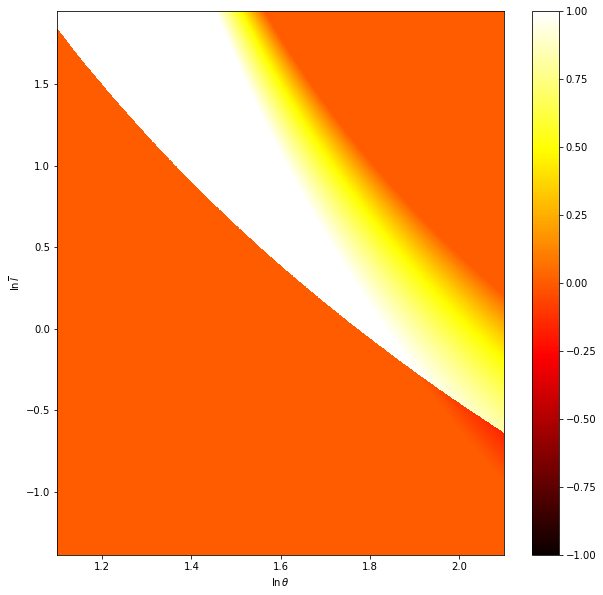

In [57]:
fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(111)
labx = ax.set_xlabel(r'$\ln\theta$')
laby = ax.set_ylabel(r'$\ln\overline{l}$')

clm = ax.pcolormesh(T, L_l , DIFF, norm=colors.CenteredNorm(), cmap='hot')
bar = fig.colorbar(clm, ax=ax)

# Plot of the difference in welfare

In [9]:
optwelf = sw(TO, T, L)
decwelf = sw(TD, T, L) 

In [10]:
diff = optwelf - decwelf

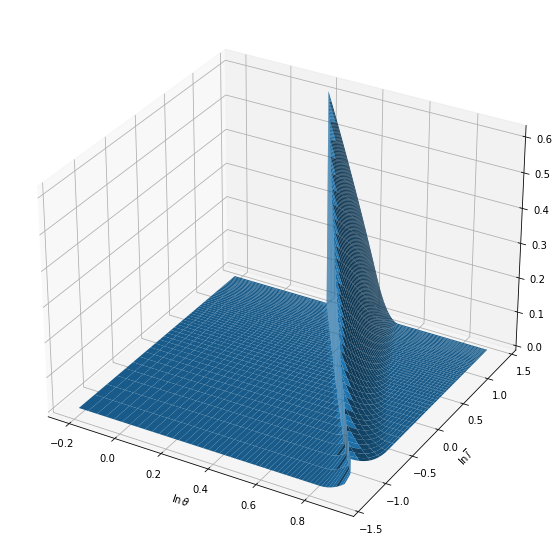

In [11]:
fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(111, projection='3d')
labx = ax.set_xlabel(r'$\ln\theta$')
laby = ax.set_ylabel(r'$\ln\overline{l}$')

surf = ax.plot_surface(T_l, L_l , diff)

With the social-welfare optimizing enclosures:

$$
\theta F_T^e - c - F_T^e + \left(\theta F_L^e - F_L^c\right)\frac{dl_e}{dt_e} \geq 0
$$

Just to repeat the derivation, social welfare requires maximizing:

$$
\theta F(T_e,L_e) + F(T_c,L_c) - cT_e
$$

We rewrite this to give:

$$
F(\bar T, \bar L)\left[\theta F(t_e,l_e)+F(t_c,l_c)\right] - cT_e\quad\rightarrow\quad 
F(\bar T, \bar L)\left[\theta F(t_e,l_e)+F(1-t_e,1-l_e)\right] - c\bar T t_e
$$

This last expression can also be written in intensive form as follows:

$$
\bar T\left[ f(\bar l)\left(\theta F(t_e,l_e)+F(1-t_e,1-l_e)\right) -ct_e \right]
$$

### Social optimum

To derive the basic condition, note that $l_e(t_e)$ and take derivatives:


$$
 f(\bar l)\left(\theta F^e_t-F^c_t+\left(\theta F^e_l-F^c_l\right)\frac{\partial t_e}{\partial l_e}\right) -c
$$



Let's see where we can get with this function. We have:

$$
\theta F_t^e - F_t^c = \theta(1-\alpha)\left(\frac{l_e}{t_e}\right)^\alpha-(1-\alpha)\left(\frac{1-l_e}{1-t_e}\right)^\alpha
$$

$$
\theta F_l^e - F_l^c = \theta\alpha\left(\frac{t_e}{l_e}\right)^{1-\alpha}-\alpha\left(\frac{1-t_e}{1-l_e}\right)^{1-\alpha}
$$

and

$$
\frac{dl_e}{dt_e}=\frac{\Lambda }{1+\left(\Lambda - 1\right)t_e}-(\Lambda-1)\frac{\Lambda t_e }{(1+\left(\Lambda - 1\right)t_e)^2}
$$

which then becomes:

$$
\frac{dl_e}{dt_e}=\frac{\Lambda (1+\left(\Lambda - 1\right)t_e) }{(1+\left(\Lambda - 1\right)t_e)^2}-(\Lambda-1)\frac{\Lambda t_e }{(1+\left(\Lambda - 1\right)t_e)^2}
$$

Which then becomes: 

$$
\frac{dl_e}{dt_e}=\frac{\Lambda}{(1+\left(\Lambda - 1\right)t_e)^2}
$$

We then have to go as follows: 

$$
\frac{l_e}{t_e}=\frac{\Lambda}{1+(\Lambda-1)t_e},\quad \frac{1-l_e}{1-t_e}=\frac{1}{1+(\Lambda-1)t_e}
$$

So, the next round of simplifications we can do is:

$$
\theta F_t^e - F_t^c=\theta(1-\alpha)\left(\frac{\Lambda}{1+(\Lambda-1)t_e}\right)^\alpha-(1-\alpha)\left(\frac{1}{1+(\Lambda-1)t_e}\right)^\alpha=\frac{(1-\alpha)(\theta \Lambda^\alpha-1)}{\left(1+(\Lambda-1)t_e\right)^\alpha},\quad \Lambda=(\alpha\theta)^\frac{1}{1-\alpha}
$$

Also, we have:

$$
\theta F_l^e - F_l^c = \theta\alpha\left(\frac{\Lambda}{1+(\Lambda-1)t_e}\right)^{\alpha-1}-\alpha\left(\frac{1}{1+(\Lambda-1)t_e}\right)^{\alpha-1}=\frac{\alpha(\theta\Lambda^{\alpha-1}-1)}{(1+(\Lambda-1)t_e)^{\alpha-1}}
$$

So, putting it all together, we get:

$$
\bar l^\alpha\left(\frac{(1-\alpha)(\theta \Lambda^\alpha-1)}{\left(1+(\Lambda-1)t_e\right)^\alpha}+\frac{\alpha(\theta\Lambda^{\alpha-1}-1)}{(1+(\Lambda-1)t_e)^{\alpha-1}}\frac{\Lambda}{(1+\left(\Lambda - 1\right)t_e)^2}\right)-c
$$

Quite immediately, this simplifies to:

$$
\bar l ^\alpha\left(\frac{(1-\alpha)(\theta \Lambda^\alpha-1)}{\left(1+(\Lambda-1)t_e\right)^\alpha}+\frac{\alpha(\theta\Lambda^{\alpha}-\Lambda)}{(1+(\Lambda-1)t_e)^{\alpha+1}}\right)-c
$$

This could be simplified more, but we can also substitute in for $t_e$ at this point:

$$
t_e=\frac{\left(\frac{(1-\alpha)\theta}{c}\right)^\frac{1}{\alpha}\Lambda \bar l-1}{\Lambda - 1}
$$



$$
\bar l ^\alpha\left(\frac{(1-\alpha)(\theta \Lambda^\alpha-1)}{\left(\left(\frac{(1-\alpha)\theta}{c}\right)^\frac{1}{\alpha}\Lambda \bar l\right)^\alpha}+\frac{\alpha(\theta\Lambda^{\alpha}-\Lambda)}{\left(\left(\frac{(1-\alpha)\theta}{c}\right)^\frac{1}{\alpha}\Lambda \bar l\right)^{\alpha+1}}\right)-c
$$

We can observe a couple of things more or less right off the bat. We will have:

$$
\frac{c(\theta \Lambda^\alpha-1)}{\theta \Lambda^\alpha}+\left(\frac{c}{(1-\alpha)\theta}\right)^{\frac{\alpha+1}{\alpha}}\frac{\alpha(\theta\Lambda^\alpha-\Lambda)}{\Lambda^{\alpha+1}\bar l}-c
$$

But what we want is for this to all equal zero. Hence, what we get is:

$$
\frac{c(\theta \Lambda^\alpha-1)}{\theta \Lambda^\alpha}+\left(\frac{c}{(1-\alpha)\theta}\right)^{\frac{\alpha+1}{\alpha}}\frac{\alpha(\theta\Lambda^\alpha-\Lambda)}{\Lambda^{\alpha+1}\bar l}=c
$$

Divide by $c$:

$$
\frac{\theta \Lambda^\alpha-1}{\theta \Lambda^\alpha}+c^{\frac{1}{\alpha}}\left(\frac{1}{(1-\alpha)\theta}\right)^{\frac{\alpha+1}{\alpha}}\frac{\alpha(\theta\Lambda^\alpha-\Lambda)}{\Lambda^{\alpha+1}\bar l}=1
$$

Expand the first term and simplify:

$$
1 -\frac{1}{\theta \Lambda^\alpha}+c^{\frac{1}{\alpha}}\left(\frac{1}{(1-\alpha)\theta}\right)^{\frac{\alpha+1}{\alpha}}\frac{\alpha(\theta\Lambda^\alpha-\Lambda)}{\Lambda^{\alpha+1}\bar l}=1
$$



The ones cancel out, and we can add over the thing we just cancelled so we have:

$$
 c^{\frac{1}{\alpha}}\left(\frac{1}{(1-\alpha)\theta}\right)^{\frac{\alpha+1}{\alpha}}\frac{\alpha(\theta\Lambda^\alpha-\Lambda)}{\Lambda^{\alpha+1}\bar l}=\frac{1}{\theta \Lambda^\alpha}
$$

Some more cancellations:

$$
 \bar l = \left(\frac{c}{\theta}\right)^{\frac{1}{\alpha}}\left(\frac{1}{(1-\alpha)}\right)^{\frac{\alpha+1}{\alpha}}\alpha(\theta\Lambda^{\alpha-1}-1)
$$

But now we remember that: $\Lambda=(\alpha\theta)^\frac{1}{1-\alpha}$, so we can plug this in and get:

$$
 \bar l = \left(\frac{c}{\theta}\right)^{\frac{1}{\alpha}}\left(\frac{1}{(1-\alpha)}\right)^{\frac{\alpha+1}{\alpha}}\alpha\left(\frac{\theta}{\alpha\theta}-1\right)
$$

Even further, we get:

$$
\bar l = \left(\frac{c}{\theta}\right)^{\frac{1}{\alpha}}\left(\frac{1}{(1-\alpha)}\right)^{\frac{\alpha+1}{\alpha}}(1-\alpha)
$$

Which then quite succinctly becomes:

$$
\bar l =\left(\frac{c}{\theta (1-\alpha)}\right)^\frac{1}{\alpha}
$$

## Alternative approach

Equation 23 in the paper gives us the following expression for a planners return function:

$$
\bar l^\alpha \frac{1+\left(\frac{\Lambda}{\alpha}-1\right)t_e}{(1+(\Lambda-1)t_e)^\alpha}-ct_e
$$

which we can directly differentiate to embody the same logic. This time, let's do computer algebra. 

In [1]:
from sympy import *

init_printing()

In [2]:
alpha, theta, c, Lambda, l, te = symbols('alpha theta c Lambda \overline{l} t_e')

Here is our basic expression for $t_e^*$, which is the decentralized value:

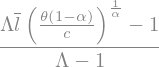

In [3]:
testa = ( ((1-alpha)*theta/c)**(1/alpha)*Lambda*l - 1 ) / (Lambda - 1)
testa

The return function as it appears in the paper is:

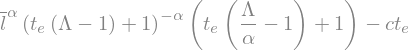

In [4]:
retfun = l**alpha *(1 + (Lambda/alpha -1 )*te) / (1 + (Lambda-1)*te)**alpha - c*te

retfun

Taking the derivative to maximize the above gives:

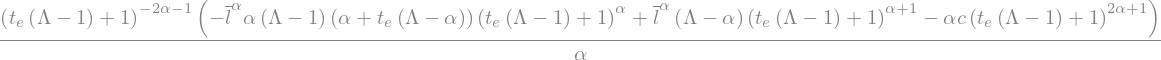

In [5]:
foc = diff(retfun, te).simplify()
foc

Miraculously, if we substitute in the equilibrium value of $t_e$ directly, and then solve for $l$ (really, $\bar l$), we get the following:

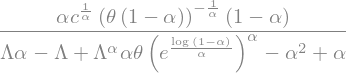

In [6]:
solns = solve(foc.subs({te:testa}), l)
keysol = solns[1]
keysol

Shockingly, we have a nice closed form for the locus given as above. That's kind of neat, and it can be simplified, but it takes a little bit of prodding:

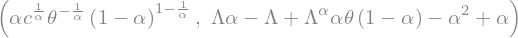

In [7]:
numer = alpha * c**(1/alpha)*theta**(-1/alpha)*(1-alpha)**(1-1/alpha)

denom = Lambda*alpha - Lambda + Lambda**alpha*alpha*theta*(1-alpha) - alpha**2 + alpha

numer, denom

Using our expression for $\Lambda$ gives us:

In [8]:
Lam = (alpha*theta)**(1/(1-alpha))
Lam

In [9]:
denom2 = factor(denom)
denom2

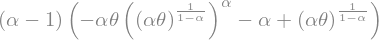

In [10]:
denom2.subs({Lambda:Lam})

If I'm not mistaken, out of this we get:

$$
(\alpha-1)(-\alpha)=\alpha(1-\alpha)
$$

Hence, our numerator and denominator are:

$$
\frac{\alpha \left(\frac{c}{\theta}\right)^{\frac{1}{\alpha}}(1-\alpha)^{1-\frac{1}{\alpha}}}{\alpha(1-\alpha)}
$$

So, in the end, our locus is described by:

$$
\bar l = \left(\frac{c}{\theta(1-\alpha)}\right)^\frac{1}{\alpha}
$$

Which is exactly the same answer we arrived at the other way...so, this needs to be explained. 